# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

####### Analysis For Northern/Southern Hemishere Linear Regression Lines (08/01/2020):

####### Analysis for Northern/Southern Hemisphere Maximum Temperature versus Latitude Linear Regression (08/01/2020):

The linear regression lines for both the Northern and Southern Hemisphere appear to demonstrate the relationship between temperature and latitude. For both hemispheres, the farther the city is from the equator (0 on the graph), the maximum temp for those cities tends to be lower in measured temperature. This is what we would expect, that cities nearer to the equator would experience higher maximum temperatures. The regression lines appear to have a near inverse relationship to each other.

####### Analysis for Northern/Southern Hemisphere Humidity versus Latitude Linear Regression (08/01/2020):

The relationship for the location of cities and humidity in the Northern and Souther Hemispheres based on the day
that this data was taken, appears to show a slight increase in humidity for the Southern Hemisphere cities as they move further from the equator. The linear regression line for the Northern Hemisphere cities appear to demonstrate an even smaller increase in humidity as those northern hemisphere cities move away from the equator. Both linear regression lines show humidity to be near 70 percent with the southern hemisphere approaching 80 percent at it's greatest point away from the equator. More measurements over a period of time would help confirm if these relationships are valid.

####### Analysis for Northern/Southern Hemisphere Cloudiness versus Latitude Linear Regression (08/01/2020:

It appears that for both the Northern and Southern Hemispheres the linear regression lines show no relationship between cloudiness and the latitude for this date that this data was pulled. Where a city is located, seems to have very little relationship to the cloudiness and it's distance from the equator for this data. Due to such seasonal/daily variabilty this would seem to be difficult to show. More plots over a period of time would be needed to further evaluate whether any relationship could be gleaned. 

####### Analysis for Northern/Southern Hemisphere Wind Speed versus Latitude Linear Regression (08/01/2020):

The comparison of wind speeds for the city's locations across the Northern and Southern hemisphere appear to demonstrate a slight decrease in wind speeds as the latitudes become farther away from the equator. There seems to be an inverse relationship of linear regression for the wind speeds between the Northern and Southern hemispheres.
With the time that this data was taken, the linear regression is minimal. Again, more plots over a period of time would be needed to further evaluate whether any significant relationship could be attributed.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [5]:
cities


['kitgum',
 'bredasdorp',
 'rikitea',
 'iracoubo',
 'vao',
 'rio grande',
 'tual',
 'nikolskoye',
 'ushuaia',
 'karaul',
 'pokrovskoye',
 'sentyabrskiy',
 'lebu',
 'victoria',
 'new norfolk',
 'bambous virieux',
 'zemio',
 'mahebourg',
 'castro',
 'sola',
 'saint george',
 'carnarvon',
 'ust-kuyga',
 'haileybury',
 'pozo colorado',
 'avarua',
 'shingu',
 'grindavik',
 'severo-kurilsk',
 'lorengau',
 'saint-philippe',
 'arraial do cabo',
 'leningradskiy',
 'kavaratti',
 'vila velha',
 'puerto ayora',
 'illoqqortoormiut',
 'barentsburg',
 'bengkulu',
 'ust-nera',
 'hilo',
 'kandrian',
 'clyde river',
 'hermanus',
 'souillac',
 'baker city',
 'wahlern',
 'longyearbyen',
 'punta arenas',
 'alice springs',
 'tete',
 'rawson',
 'initao',
 'monterrey',
 'petropavlovsk-kamchatskiy',
 'omboue',
 'ryotsu',
 'cap malheureux',
 'olafsvik',
 'port alfred',
 'ribeira grande',
 'poum',
 'ulladulla',
 'cascais',
 'cabo san lucas',
 'busselton',
 'belushya guba',
 'guerrero negro',
 'cape town',
 'koms

In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
        

In [8]:
# Create lists for holding information
cityname = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
cityid = []

# Loop through the list of cities and perform a request for data on each with try/except for handling purposes
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cityname.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cityid.append(response["id"])
    
        print(f"The city is: {cityname} and id is: {cityid}")
       
    except:
        print("No data for that city")
        pass        


The city is: ['Kitgum'] and id is: [230893]
The city is: ['Kitgum', 'Bredasdorp'] and id is: [230893, 1015776]
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea'] and id is: [230893, 1015776, 4030556]
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo'] and id is: [230893, 1015776, 4030556, 3381428]
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao'] and id is: [230893, 1015776, 4030556, 3381428, 2137773]
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande'] and id is: [230893, 1015776, 4030556, 3381428, 2137773, 3451138]
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual'] and id is: [230893, 1015776, 4030556, 3381428, 2137773, 3451138, 1623197]
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye'] and id is: [230893, 1015776, 4030556, 3381428, 2137773, 3451138, 1623197, 546105]
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio 

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau'] and id is: [230893, 1015776, 4030556, 3381428, 2137773, 3451138, 1623197, 546105, 3833367, 507427, 3883457, 1819729, 2155415, 1106677, 235826, 934322, 3466704, 2134814, 5546220, 2074865, 2013921, 5968992, 3437443, 4035715, 1847947, 3416888, 2121385, 2092164]
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe']

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River'] and id is: [230893, 1015776, 4030556, 3381428, 2137773, 3451138, 1623197, 546105, 3833367, 507427, 3883457, 1819729, 2155415, 1106677, 235826, 934322, 3466704, 2134814, 5546220, 2074865, 2013921, 5968992, 3437443, 4035715, 1847947, 3416888, 2121385, 2092164, 935215, 3471451, 2123814, 1267390, 3445026, 3652764, 1649150, 2120048, 5855927, 2094746, 5924351]
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovsko

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson'] and id is: [230893, 1015776, 4030556, 3381428, 2137773, 3451138, 1623197, 546105, 3833367, 507427, 3883457, 1819729, 2155415, 1106677, 235826, 934322, 3466704, 2134814, 5546220, 2074865, 2013921, 5968992, 3437443, 4035715, 1847947, 3416888, 2121385, 2092164, 935215, 3471451, 2123814, 1267390, 3445026, 3652764, 1649150, 2120048, 5855927, 2094746, 5924351, 3366880, 

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande'] and id is: [230893, 1015776, 4030556, 3381428, 2137773, 3451138, 1623197, 546105, 3833367, 507427, 3883457, 1819729, 2155415, 1106677, 235826, 934322, 3466704, 2134814, 5546220, 2074865, 2013921, 5968992, 3437443, 4035715, 1

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town'] and id is: [230893, 1015776, 4030556, 3381428, 2137773, 3451138, 1623197, 546105, 3833367, 507427, 3883457, 1819729, 2155415, 1106

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa'] and id is: [230893, 1015776, 4030556, 33814

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa',

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa',

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

No data for that city
The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hoba

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

The city is: ['Kitgum', 'Bredasdorp', 'Rikitea', 'Iracoubo', 'Vao', 'Rio Grande', 'Tual', 'Nikolskoye', 'Ushuaia', 'Pokrovskoye', 'Lebu', 'Hong Kong', 'New Norfolk', 'Bambous Virieux', 'Zemio', 'Mahébourg', 'Castro', 'Sola', 'Saint George', 'Carnarvon', 'Ust-Kuyga', 'Haileybury', 'Pozo Colorado', 'Avarua', 'Shingū', 'Grindavik', "Severo-Kuril'sk", 'Lorengau', 'Saint-Philippe', 'Arraial do Cabo', 'Leningradskiy', 'Kavaratti', 'Vila Velha', 'Puerto Ayora', 'Bengkulu', 'Ust-Nera', 'Hilo', 'Kandrian', 'Clyde River', 'Hermanus', 'Souillac', 'Baker City', 'Wahlern', 'Longyearbyen', 'Punta Arenas', 'Alice Springs', 'Tete', 'Rawson', 'Initao', 'Monterrey', 'Petropavlovsk-Kamchatskiy', 'Omboué', 'Ryōtsu-minato', 'Cap Malheureux', 'Olafsvik', 'Port Alfred', 'Ribeira Grande', 'Poum', 'Ulladulla', 'Cascais', 'Cabo San Lucas', 'Busselton', 'Guerrero Negro', 'Cape Town', 'Yangi Marg`ilon', 'Portland', 'Sinazongwe', 'Saskylakh', 'Mataura', 'Sitka', 'Kapaa', 'Port Lincoln', 'Hobart', 'Labuhan', 'Atar'

In [11]:
len(cityname)


551

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# create a data frame from cities, latitude, longitude, max temp, humidity, cloudiness, wind speed, country and date
weather_dict = {
    "City": cityname,
    "Lat": lat,
    "Lng": lon,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":windspeed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kitgum,3.28,32.89,18.34,91,35,1.63,UG,1596317805
1,Bredasdorp,-34.53,20.04,9.00,93,0,2.10,ZA,1596317806
2,Rikitea,-23.12,-134.97,23.29,77,11,3.64,PF,1596317668
3,Iracoubo,5.48,-53.20,26.68,84,90,3.18,GF,1596317669
4,Vao,-22.67,167.48,19.04,69,32,7.60,NC,1596317669
...,...,...,...,...,...,...,...,...,...
546,Dubai,25.26,55.30,36.00,53,38,2.60,AE,1596317731
547,Sur,22.57,59.53,28.79,72,12,5.20,OM,1596317805
548,Lata,40.16,-8.33,19.44,72,0,2.68,PT,1596317614
549,Okhotsk,59.38,143.30,16.23,61,0,1.93,RU,1596317805


In [13]:
weather_data.max()


City               Şabyā
Lat                78.22
Lng               179.32
Max Temp           42.78
Humidity             100
Cloudiness           100
Wind Speed         13.19
Country               ZM
Date          1596317890
dtype: object

In [14]:
weather_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,19.811325,20.082740,20.696316,71.499093,46.698730,3.503067,1.596318e+09
std,33.605991,90.468698,7.642045,19.952933,39.089454,2.320556,8.696476e+01
min,-54.800000,-179.170000,1.000000,8.000000,0.000000,0.120000,1.596317e+09
25%,-8.260000,-59.430000,14.515000,61.500000,2.000000,1.790000,1.596318e+09
50%,22.680000,23.030000,21.890000,77.000000,40.000000,3.100000,1.596318e+09
75%,47.560000,100.345000,26.500000,86.000000,90.000000,4.600000,1.596318e+09
max,78.220000,179.320000,42.780000,100.000000,100.000000,13.190000,1.596318e+09


In [15]:
# No cities with over 100% humidity


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [151]:
# Extract relevant fields from the data frame

clean_city_data = pd.DataFrame(weather_data)
clean_city_data
# Export the City_Data into a csv
#clean_city_data.to_csv("clean_city_data.csv", index=False, header=True)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kitgum,3.28,32.89,18.34,91,35,1.63,UG,1596317805
1,Bredasdorp,-34.53,20.04,9.00,93,0,2.10,ZA,1596317806
2,Rikitea,-23.12,-134.97,23.29,77,11,3.64,PF,1596317668
3,Iracoubo,5.48,-53.20,26.68,84,90,3.18,GF,1596317669
4,Vao,-22.67,167.48,19.04,69,32,7.60,NC,1596317669
...,...,...,...,...,...,...,...,...,...
546,Dubai,25.26,55.30,36.00,53,38,2.60,AE,1596317731
547,Sur,22.57,59.53,28.79,72,12,5.20,OM,1596317805
548,Lata,40.16,-8.33,19.44,72,0,2.68,PT,1596317614
549,Okhotsk,59.38,143.30,16.23,61,0,1.93,RU,1596317805


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

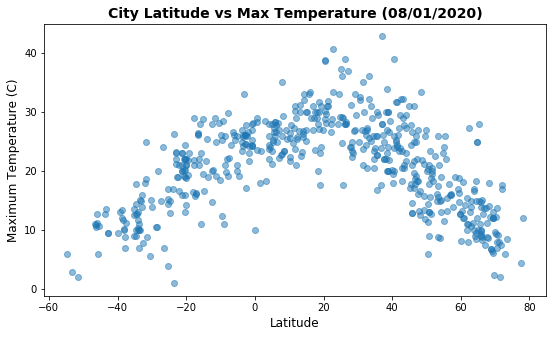

In [132]:
# Create a Scatter Plot for temperature vs latitude
plt.figure(figsize=(9,5))
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
plt.scatter(x_values,y_values, alpha=0.5)
plt.title("City Latitude vs Max Temperature (08/01/2020)", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Maximum Temperature (C)", fontdict={"fontsize": 12})
plt.savefig("Latitude v Temp.png", dpi=175)
plt.show()
#plt.scatter(weights, tumors, marker="+", color="b") try to change edge color? and add grid


## Latitude vs. Humidity Plot

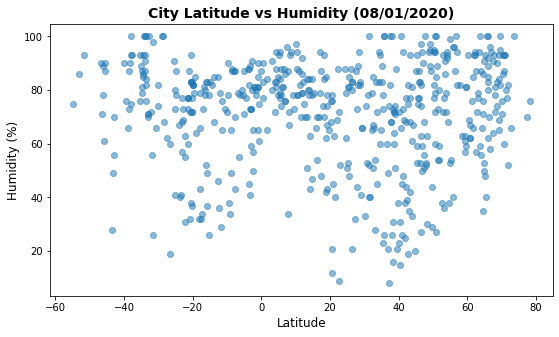

In [133]:
# Create a Scatter Plot for temperature vs latitude
plt.figure(figsize=(9,5))
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]
plt.scatter(x_values,y_values, alpha=0.5)
plt.title("City Latitude vs Humidity (08/01/2020)", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Humidity (%)", fontdict={"fontsize": 12})
plt.savefig("Latitude v Humidity.png", dpi=175)
plt.show()


## Latitude vs. Cloudiness Plot

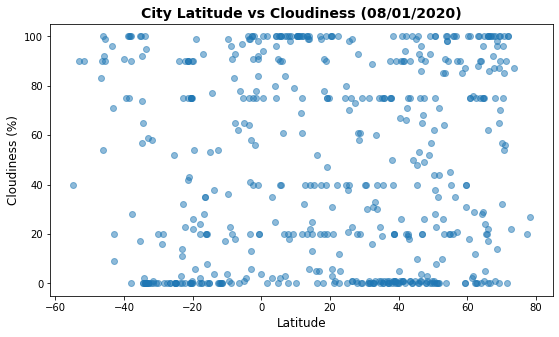

In [135]:
# Create a Scatter Plot for cloudiness vs latitude
plt.figure(figsize=(9,5))
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]
plt.scatter(x_values,y_values, alpha=0.5)
plt.title("City Latitude vs Cloudiness (08/01/2020)", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Cloudiness (%)", fontdict={"fontsize": 12})
plt.savefig("Latitude v Cloudiness.png", dpi=175)
plt.show()


## Latitude vs. Wind Speed Plot

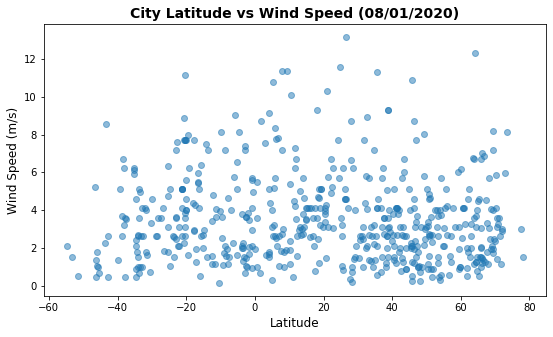

In [136]:
# Create a Scatter Plot for wind speed vs latitude
plt.figure(figsize=(9,5))
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]
plt.scatter(x_values,y_values, alpha=0.5)
plt.title("City Latitude vs Wind Speed (08/01/2020)", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Wind Speed (m/s)", fontdict={"fontsize": 12})
plt.savefig("Latitude v Wind Speed.png", dpi=175)
plt.show()


## Linear Regression

In [139]:
# OPTIONAL: Create a function to create Linear Regression plots


In [146]:
# Create Northern Hemisphere Dataframe
northernhem_lat = clean_city_data.loc[clean_city_data["Lat"] >= 0]
northernhem_lat
                                      

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kitgum,3.28,32.89,18.34,91,35,1.63,UG,1596317805
3,Iracoubo,5.48,-53.20,26.68,84,90,3.18,GF,1596317669
7,Nikolskoye,59.70,30.79,12.78,81,40,1.00,RU,1596317587
9,Pokrovskoye,47.42,38.90,18.33,68,26,1.79,RU,1596317807
11,Hong Kong,22.29,114.16,26.67,88,100,4.92,HK,1596317795
...,...,...,...,...,...,...,...,...,...
546,Dubai,25.26,55.30,36.00,53,38,2.60,AE,1596317731
547,Sur,22.57,59.53,28.79,72,12,5.20,OM,1596317805
548,Lata,40.16,-8.33,19.44,72,0,2.68,PT,1596317614
549,Okhotsk,59.38,143.30,16.23,61,0,1.93,RU,1596317805


In [147]:
# Create Southern Hemisphere Dataframe
southernhem_lat = clean_city_data.loc[clean_city_data["Lat"] < 0]
southernhem_lat

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bredasdorp,-34.53,20.04,9.00,93,0,2.10,ZA,1596317806
2,Rikitea,-23.12,-134.97,23.29,77,11,3.64,PF,1596317668
4,Vao,-22.67,167.48,19.04,69,32,7.60,NC,1596317669
5,Rio Grande,-32.03,-52.10,18.00,72,0,4.10,BR,1596317669
6,Tual,-5.67,132.75,25.21,80,97,9.02,ID,1596317669
...,...,...,...,...,...,...,...,...,...
526,Metro,-5.11,105.31,21.06,87,65,1.64,ID,1596317799
528,Trenggalek,-8.05,111.72,22.05,87,83,1.93,ID,1596317800
530,Jayanca,-6.39,-79.82,26.67,55,0,2.24,PE,1596317801
533,Quatre Cocos,-20.21,57.76,22.00,83,75,7.70,MU,1596317801


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [144]:
# Create x and y values for Northern Hemisphere Temp and Latitude
x_values = northernhem_lat["Lat"]
y_values = northernhem_lat["Max Temp"]

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


The r-squared is: 0.4782307903890464


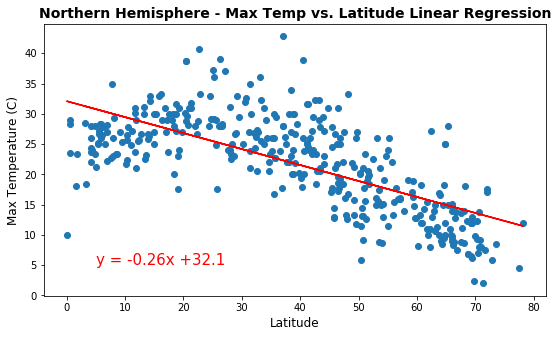

In [145]:
# Create Plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Max Temperature (C)", fontdict={"fontsize": 12})
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.savefig("Northern_Hem Max_Temp v Latitude.png", dpi=175)
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6087958956943705


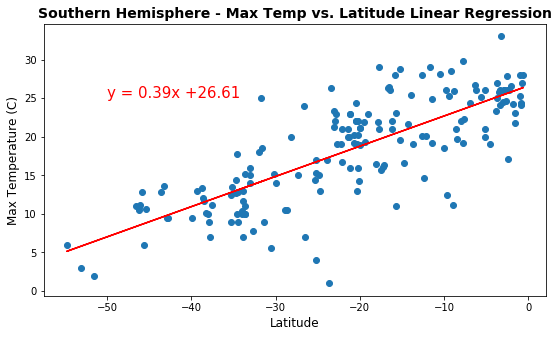

In [123]:
# Create x and y values for Southern Hemisphere Temp and Latitude
x_values = southernhem_lat["Lat"]
y_values = southernhem_lat["Max Temp"]
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Max Temperature (C)", fontdict={"fontsize": 12})
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.savefig("Southern_Hem Max_Temp v Latitude.png", dpi=175)
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####### Analysis for Northern/Southern Hemisphere Maximum Temperature versus Latitude Linear Regression (08/01/2020):

The linear regression lines for both the Northern and Southern Hemisphere appear to demonstrate the relationship between temperature and latitude. For both hemispheres, the farther the city is from the equator (0 on the graph), the maximum temp for those cities tends to be lower in measured temperature. This is what we would expect, that cities nearer to the equator would experience higher maximum temperatures. The regression lines appear to have a near inverse relationship to each other.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00048666539848916994


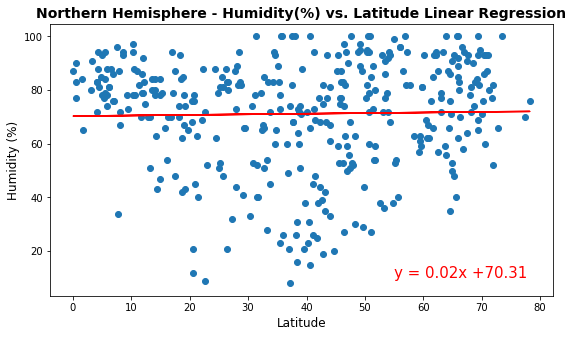

In [124]:
# Create x and y values for Northern Hemisphere Humidity and Latitude
x_values = northernhem_lat["Lat"]
y_values = northernhem_lat["Humidity"]
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
  
# Create Plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Humidity (%)", fontdict={"fontsize": 12})
plt.annotate(line_eq,(55,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.savefig("Northern_Hem Humidity v Latitude.png", dpi=175)
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.027759988765788817


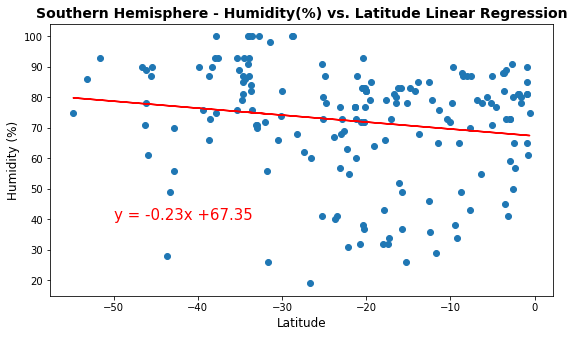

In [125]:
# Create x and y values for Southern Hemisphere Humidity and Latitude
x_values = southernhem_lat["Lat"]
y_values = southernhem_lat["Humidity"]
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Humidity (%)", fontdict={"fontsize": 12})
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.savefig("Southern_Hem Humidity v Latitude.png", dpi=175)
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####### Analysis for Northern/Southern Hemisphere Humidity versus Latitude Linear Regression (08/01/2020):

The relationship for the location of cities and humidity in the Northern and Souther Hemispheres based on the day
that this data was taken, appears to show a slight increase in humidity for the Southern Hemisphere cities as they move further from the equator. The linear regression line for the Northern Hemisphere cities appear to demonstrate an even smaller increase in humidity as those northern hemisphere cities move away from the equator. Both linear regression lines show humidity to be near 70 percent with the southern hemisphere approaching 80 percent at it's greatest point away from the equator. More measurements over a period of time would help confirm if these relationships are valid.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 2.8584543214359864e-11


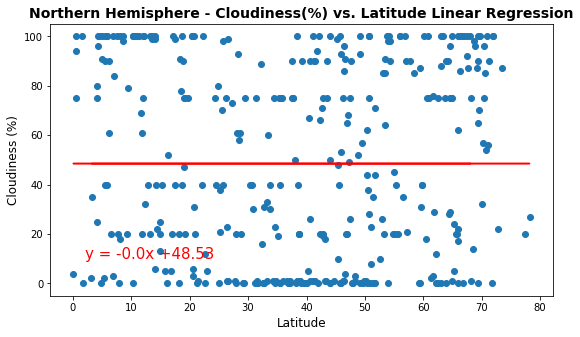

In [126]:
# Create x and y values for Northern Hemisphere Cloudiness and Latitude
x_values = northernhem_lat["Lat"]
y_values = northernhem_lat["Cloudiness"]
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
  
# Create Plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Cloudiness (%)", fontdict={"fontsize": 12})
plt.annotate(line_eq,(2,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.savefig("Northern_Hem Cloudiness v Latitude.png", dpi=175)
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0002668025952717698


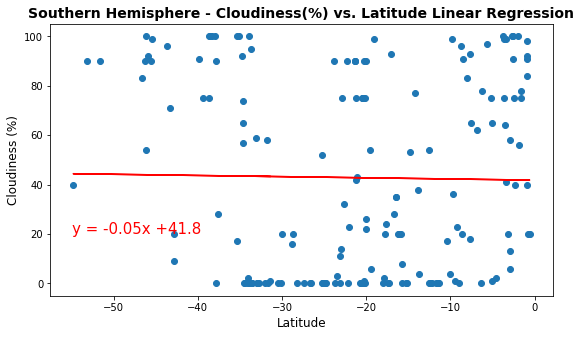

In [127]:
# Create x and y values for Southern Hemisphere Cloudiness and Latitude
x_values = southernhem_lat["Lat"]
y_values = southernhem_lat["Cloudiness"]
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Cloudiness (%)", fontdict={"fontsize": 12})
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.savefig("Southern_Hem Cloudiness v Latitude.png", dpi=175)
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####### Analysis for Northern/Southern Hemisphere Cloudiness versus Latitude Linear Regression (08/01/2020:

It appears that for both the Northern and Southern Hemispheres the linear regression lines show no relationship between cloudiness and the latitude for this date that this data was pulled. Where a city is located, seems to have very little relationship to the cloudiness and it's distance from the equator for this data. Due to such seasonal/daily variabilty this would seem to be difficult to show. More plots over a period of time would be needed to further evaluate whether any relationship could be gleaned. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.030660380671036137


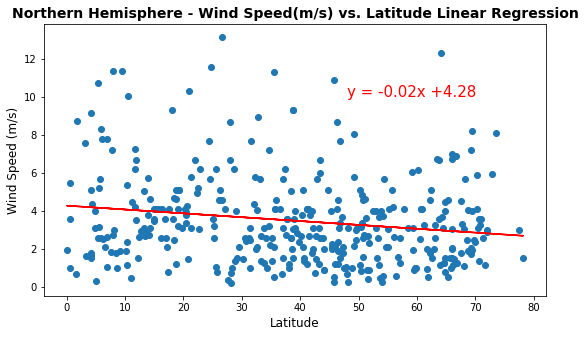

In [128]:
# Create x and y values for Northern Hemisphere Wind Speed and Latitude
x_values = northernhem_lat["Lat"]
y_values = northernhem_lat["Wind Speed"]
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
  
# Create Plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Wind Speed (m/s)", fontdict={"fontsize": 12})
plt.annotate(line_eq,(48,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed(m/s) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.savefig("Northern_Hem WindSpeed v Latitude.png", dpi=175)
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01643156818090431


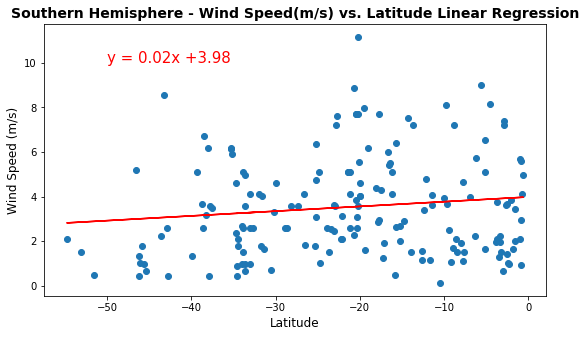

In [129]:
# Create x and y values for Southern Hemisphere Wind Speed and Latitude
x_values = southernhem_lat["Lat"]
y_values = southernhem_lat["Wind Speed"]
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Wind Speed (m/s)", fontdict={"fontsize": 12})
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed(m/s) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.savefig("Southern_Hem WindSpeed v Latitude.png", dpi=175)
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####### Analysis for Northern/Southern Hemisphere Wind Speed versus Latitude Linear Regression (08/01/2020):

The comparison of wind speeds for the city's locations across the Northern and Southern hemisphere appear to demonstrate a slight decrease in wind speeds as the latitudes become farther away from the equator. There seems to be an inverse relationship of linear regression for the wind speeds between the Northern and Southern hemispheres.
With the time that this data was taken, the linear regression is minimal. Again, more plots over a period of time would be needed to further evaluate whether any significant relationship could be attributed.